In [11]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from main_numpy import NeuronModel
import powerlaw

In [2]:
def create_2d_grid_graph(rows, columns):
    """Returns network as 2D grid graph and nodes on the periphery are connected to sink"""
    grid_graph = nx.grid_2d_graph(rows, columns)
    converted_graph = nx.convert_node_labels_to_integers(grid_graph)
    converted_graph.add_node(-1)  # Add sink node

    for node in converted_graph.nodes():
        if converted_graph.degree(node) < 4:
            converted_graph.add_edge(node, -1)  # Add edge to sink node

    return converted_graph

In [3]:
rows = 10
columns = 10

grid_network = create_2d_grid_graph(rows, columns)
grid_network_model = NeuronModel(grid_network)   
grid_network_data = np.array(grid_network_model.run(100000))  # number of steps

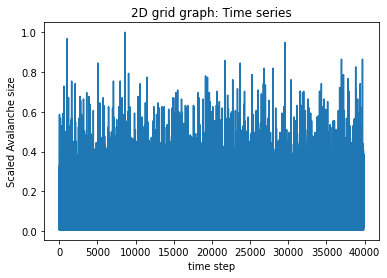

In [5]:
norm_grid_network_data = [aval_size/max(grid_network_data) for aval_size in grid_network_data] #to scale data

plt.figure()
plt.plot(norm_grid_network_data)

# Add labels and title
plt.xlabel('time step')
plt.ylabel('Scaled Avalanche size')
plt.title('2D grid graph: Time series')

# Show the plot
plt.show()   

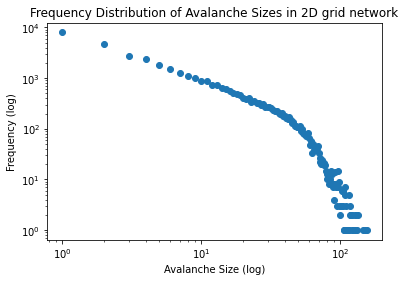

In [4]:
# Calculate the unique avalanche sizes and their frequencies
avalanche_sizes_grid, frequencies_grid = np.unique(grid_network_data, return_counts=True)

# Plot the data points on a log-log scale
plt.figure()
plt.scatter(avalanche_sizes_grid, frequencies_grid)

# Set log-log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Avalanche Size (log)')
plt.ylabel('Frequency (log)')
plt.title('Frequency Distribution of Avalanche Sizes in 2D grid network')

# Show the plot
plt.show()

For different network size

In [6]:
grid_network_20 = create_2d_grid_graph(20, 20)
grid_network_model_20 = NeuronModel(grid_network_20)   
grid_network_data_20 = np.array(grid_network_model_20.run(50000))  # number of steps

In [7]:
grid_network_40 = create_2d_grid_graph(40, 40)
grid_network_model_40 = NeuronModel(grid_network_40)   
grid_network_data_40 = np.array(grid_network_model_40.run(50000))  # number of steps

In [8]:
grid_network_100 = create_2d_grid_graph(100, 100)
grid_network_model_100 = NeuronModel(grid_network_100)   
grid_network_data_100 = np.array(grid_network_model_100.run(50000))  # number of steps

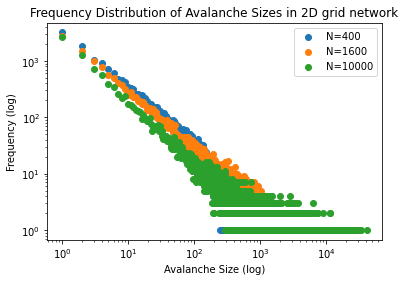

In [9]:
# Calculate the unique avalanche sizes and their frequencies
avalanche_sizes_grid_20, frequencies_grid_20 = np.unique(grid_network_data_20, return_counts=True)
avalanche_sizes_grid_40, frequencies_grid_40 = np.unique(grid_network_data_40, return_counts=True)
avalanche_sizes_grid_100, frequencies_grid_100 = np.unique(grid_network_data_100, return_counts=True)

# Plot the data points on a log-log scale
plt.figure()
plt.scatter(avalanche_sizes_grid_20, frequencies_grid_20, label="N=400")
plt.scatter(avalanche_sizes_grid_40, frequencies_grid_40, label="N=1600")
plt.scatter(avalanche_sizes_grid_100, frequencies_grid_100, label="N=10000")

# Set log-log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Avalanche Size (log)')
plt.ylabel('Frequency (log)')
plt.title('Frequency Distribution of Avalanche Sizes in 2D grid network')
plt.legend()

# Show the plot
plt.show()

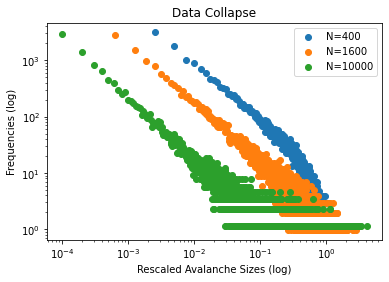

In [32]:
###### Only scaling avalanche_sizes (still needs probability scaling)
# Scaling factors 
#scaling_factors = [np.max(avalanche_sizes_grid_20),np.max(avalanche_sizes_grid_40), np.max(avalanche_sizes_grid_100)]
scaling_factors = [400, 1600, 10000]


# Rescaling the avalanche_sizes data
avalanche_sizes_grid_20_scaled = avalanche_sizes_grid_20 / scaling_factors[0]
avalanche_sizes_grid_40_scaled = avalanche_sizes_grid_40 / scaling_factors[1]
avalanche_sizes_grid_100_scaled = avalanche_sizes_grid_100 / scaling_factors[2]

frequencies_grid_20_scaled = frequencies_grid_20*0.971
frequencies_grid_40_scaled = frequencies_grid_40*0.990
frequencies_grid_100_scaled = frequencies_grid_100*1.135

# Plotting the collapsed data on a log-log plot
plt.figure()
plt.scatter(avalanche_sizes_grid_20_scaled, frequencies_grid_20_scaled, label='N=400')
plt.scatter(avalanche_sizes_grid_40_scaled, frequencies_grid_40_scaled, label='N=1600')
plt.scatter(avalanche_sizes_grid_100_scaled, frequencies_grid_100_scaled, label='N=10000')

# Set log-log scale
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Rescaled Avalanche Sizes (log)')
plt.ylabel('Frequencies (log)')
plt.title('Data Collapse')
plt.legend()
#plt.grid(True)
plt.show()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


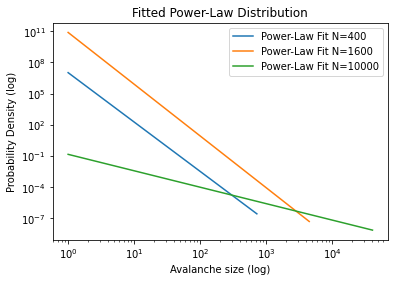

In [45]:
# Fit a power-law distribution to the data
fit_20 = powerlaw.Fit(grid_network_data_20)
fit_40 = powerlaw.Fit(grid_network_data_40)
fit_100 = powerlaw.Fit(grid_network_data_100)

# Extract the fitted power-law parameters
alpha_20 = fit_20.alpha
xmin_20 = fit_20.xmin

alpha_40 = fit_40.alpha
xmin_40 = fit_40.xmin

alpha_100 = fit_100.alpha
xmin_100 = fit_100.xmin

# Generate a range of values for x
x_20 = np.linspace(np.min(grid_network_data_20), np.max(grid_network_data_20), 100)
x_40 = np.linspace(np.min(grid_network_data_40), np.max(grid_network_data_40), 100)
x_100 = np.linspace(np.min(grid_network_data_100), np.max(grid_network_data_100), 100)

# Plot the fitted power-law distribution curve
plt.plot(x_20, (x_20 / xmin_20)**(-alpha_20 + 1) / (xmin_20 * (fit_20.n - 1)), label='Power-Law Fit N=400')
plt.plot(x_40, (x_40 / xmin_40)**(-alpha_40 + 1) / (xmin_40 * (fit_40.n - 1)),  label='Power-Law Fit N=1600')
plt.plot(x_100, (x_100 / xmin_100)**(-alpha_100 + 1) / (xmin_100 * (fit_100.n - 1)), label='Power-Law Fit N=10000')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Avalanche size (log)')
plt.ylabel('Probability Density (log)')
plt.title('Fitted Power-Law Distribution')
plt.legend()
plt.show()


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


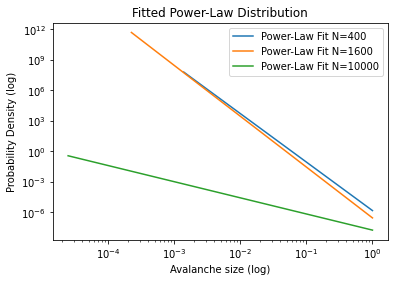

In [44]:
scaling_factors = [np.max(avalanche_sizes_grid_20),np.max(avalanche_sizes_grid_40), np.max(avalanche_sizes_grid_100)]

# Fit a power-law distribution to the data
fit_20 = powerlaw.Fit(grid_network_data_20)
fit_40 = powerlaw.Fit(grid_network_data_40)
fit_100 = powerlaw.Fit(grid_network_data_100)

# Extract the fitted power-law parameters
alpha_20 = fit_20.alpha
xmin_20 = fit_20.xmin

alpha_40 = fit_40.alpha
xmin_40 = fit_40.xmin

alpha_100 = fit_100.alpha
xmin_100 = fit_100.xmin

# Generate a range of values for x
x_20 = np.linspace(np.min(grid_network_data_20), np.max(grid_network_data_20), 100)
x_40 = np.linspace(np.min(grid_network_data_40), np.max(grid_network_data_40), 100)
x_100 = np.linspace(np.min(grid_network_data_100), np.max(grid_network_data_100), 100)

# Plot the fitted power-law distribution curve
plt.plot(x_20/scaling_factors[0], ((x_20 / xmin_20)**(-alpha_20 + 1) / (xmin_20 * (fit_20.n - 1)))*alpha_20, label='Power-Law Fit N=400')
plt.plot(x_40/scaling_factors[1], ((x_40 / xmin_40)**(-alpha_40 + 1) / (xmin_40 * (fit_40.n - 1)))*alpha_40,  label='Power-Law Fit N=1600')
plt.plot(x_100/scaling_factors[2], ((x_100 / xmin_100)**(-alpha_100 + 1) / (xmin_100 * (fit_100.n - 1)))*alpha_100, label='Power-Law Fit N=10000')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Avalanche size (log)')
plt.ylabel('Probability Density (log)')
plt.title('Fitted Power-Law Distribution')
plt.legend()
plt.show()

For different t (initial t, middle t, t final)

In [65]:
random.seed(10)
grid_network_data_40_tinitial = np.array(grid_network_model_40.run(300))  # number of steps
grid_network_data_40_tmiddle = np.array(grid_network_model_40.run(10000))  # number of steps
grid_network_data_40_tfinal = np.array(grid_network_model_40.run(50000))  # number of steps

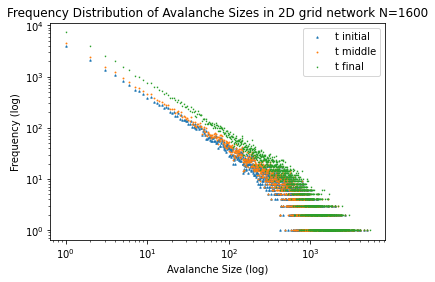

In [66]:
# Calculate the unique avalanche sizes and their frequencies
avalanche_sizes_grid_40_tinitial, frequencies_grid_40_tinitial = np.unique(grid_network_data_40_tinitial, return_counts=True)
avalanche_sizes_grid_40_tmiddle, frequencies_grid_40_tmiddle = np.unique(grid_network_data_40_tmiddle, return_counts=True)
avalanche_sizes_grid_40_tfinal, frequencies_grid_40_tfinal = np.unique(grid_network_data_40_tfinal, return_counts=True)

# Plot the data points on a log-log scale
plt.figure()
plt.scatter(avalanche_sizes_grid_40_tinitial, frequencies_grid_40_tinitial, label="t initial", marker='^', s=2)
plt.scatter(avalanche_sizes_grid_40_tmiddle, frequencies_grid_40_tmiddle, label="t middle", marker='o', s=0.8)
plt.scatter(avalanche_sizes_grid_40_tfinal, frequencies_grid_40_tfinal, label="t final", marker='v', s=0.5)

# Set log-log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Avalanche Size (log)')
plt.ylabel('Frequency (log)')
plt.title('Frequency Distribution of Avalanche Sizes in 2D grid network N=1600')
plt.legend()

# Show the plot
plt.show()

Fitting 

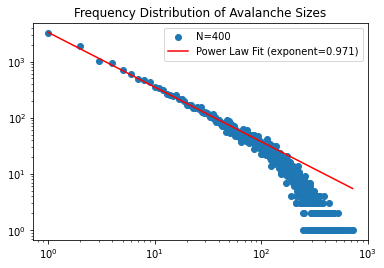

In [16]:
plt.scatter(avalanche_sizes_grid_20, frequencies_grid_20, label="N=400")

# Set log-log scale
plt.xscale('log')
plt.yscale('log')
plt.title('Frequency Distribution of Avalanche Sizes')

# Fit a power law distribution to the data
def power_law(x, alpha, C):
    return C * np.power(x, -alpha)

popt, pcov = curve_fit(power_law, avalanche_sizes_grid_20, frequencies_grid_20)
fit_alpha, fit_C = popt

# Plot the fitted power law curve
x_fit = np.logspace(np.log10(min(avalanche_sizes_grid_20)), np.log10(max(avalanche_sizes_grid_20)), 100)
y_fit = power_law(x_fit, fit_alpha, fit_C)
plt.loglog(x_fit, y_fit, 'r-', label=f'Power Law Fit (exponent={fit_alpha:.3f})')

# Add legend
plt.legend()

# Show the plot
plt.show()

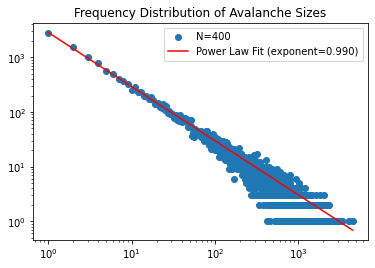

In [17]:
plt.scatter(avalanche_sizes_grid_40, frequencies_grid_40, label="N=400")

# Set log-log scale
plt.xscale('log')
plt.yscale('log')
plt.title('Frequency Distribution of Avalanche Sizes')

# Fit a power law distribution to the data
def power_law(x, alpha, C):
    return C * np.power(x, -alpha)

popt, pcov = curve_fit(power_law, avalanche_sizes_grid_40, frequencies_grid_40)
fit_alpha, fit_C = popt

# Plot the fitted power law curve
x_fit = np.logspace(np.log10(min(avalanche_sizes_grid_40)), np.log10(max(avalanche_sizes_grid_40)), 100)
y_fit = power_law(x_fit, fit_alpha, fit_C)
plt.loglog(x_fit, y_fit, 'r-', label=f'Power Law Fit (exponent={fit_alpha:.3f})')

# Add legend
plt.legend()

# Show the plot
plt.show()

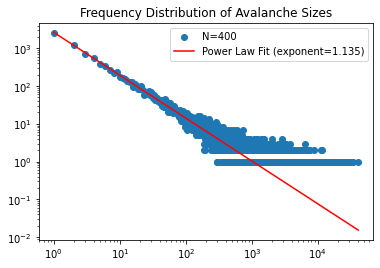

In [18]:
plt.scatter(avalanche_sizes_grid_100, frequencies_grid_100, label="N=400")

# Set log-log scale
plt.xscale('log')
plt.yscale('log')
plt.title('Frequency Distribution of Avalanche Sizes')

# Fit a power law distribution to the data
def power_law(x, alpha, C):
    return C * np.power(x, -alpha)

popt, pcov = curve_fit(power_law, avalanche_sizes_grid_100, frequencies_grid_100)
fit_alpha, fit_C = popt

# Plot the fitted power law curve
x_fit = np.logspace(np.log10(min(avalanche_sizes_grid_100)), np.log10(max(avalanche_sizes_grid_100)), 100)
y_fit = power_law(x_fit, fit_alpha, fit_C)
plt.loglog(x_fit, y_fit, 'r-', label=f'Power Law Fit (exponent={fit_alpha:.3f})')

# Add legend
plt.legend()

# Show the plot
plt.show()